In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df =pd.read_csv('/content/Housing.csv')
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df)
print(M)

trainingPercent = 0.8
numTrainingRows= int(len(df)*trainingPercent)
numTrainingRows

545


436

In [3]:
area = df.values[:, 1]
bedrooms = df.values[:, 2]
bathrooms = df.values[:, 3]
stories = df.values[:, 4]
parking = df.values[:, 10]
pricesTraining = df.values[:numTrainingRows, 0]
pricesValidation = df.values[numTrainingRows:,0]
print('area = ', area[:5])
print('bedrooms = ', bedrooms[: 5])
print('bathrooms = ', bathrooms[: 5])
print('stories = ', stories[: 5]) 
print('parking = ', parking[: 5])
print('training prices = ', pricesTraining[: 5])
print('validation prices = ', pricesValidation[: 5])

area =  [7420 8960 9960 7500 7420]
bedrooms =  [4 4 3 4 4]
bathrooms =  [2 4 2 2 1]
stories =  [3 4 2 2 2]
parking =  [2 3 2 3 2]
training prices =  [13300000 12250000 12250000 12215000 11410000]
validation prices =  [3290000 3290000 3255000 3255000 3234000]


In [4]:
def normalize(numbers):
    return [(i - min(numbers)) / (max(numbers) - min(numbers)) for i in numbers]

In [5]:
def standardize(numbers):
  mean = sum(numbers) / len(numbers)
  stddev = ( sum([((i - mean) ** 2) for i in numbers]) / len(numbers) ) ** 0.5
  return [(i - mean) / stddev for i in numbers]

In [6]:
#run this block to normalize the input data
area = normalize(area)
bedrooms = normalize(bedrooms)
bathrooms = normalize(bathrooms)
stories = normalize(stories)
parking = normalize(parking)
pricesTraining = normalize(pricesTraining)
pricesValidation = normalize(pricesValidation)
print(area[:5])
print(max(area))
print(min(area))

[0.3965635738831615, 0.5024054982817869, 0.5711340206185567, 0.4020618556701031, 0.3965635738831615]
1.0
0.0


In [7]:
#run this block to standardize the input data
area = standardize(area)
bedrooms = standardize(bedrooms)
bathrooms = standardize(bathrooms)
stories = standardize(stories)
parking = standardize(parking)
pricesTraining = standardize(pricesTraining)
pricesValidation = standardize(pricesValidation)
print(area[:5])
print(max(area))
print(min(area))

[1.0467262882352084, 1.7570095257333913, 2.2182324072257176, 1.0836241187545947, 1.0467262882352084]
5.096263187737835
-1.6145297379755157


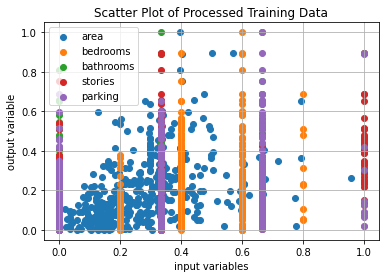

In [7]:
plt.scatter(area[:numTrainingRows],pricesTraining,color='tab:blue',label='area')
plt.scatter(bedrooms[:numTrainingRows],pricesTraining,color='tab:orange',label='bedrooms')
plt.scatter(bathrooms[:numTrainingRows],pricesTraining,color='tab:green',label='bathrooms')
plt.scatter(stories[:numTrainingRows],pricesTraining,color='tab:red',label='stories')
plt.scatter(parking[:numTrainingRows],pricesTraining,color='tab:purple',label='parking')
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('input variables')
plt.ylabel('output variable')
plt.title('Scatter Plot of Processed Training Data')
plt.legend()

In [8]:
xOnes = np.ones((M, 1)) 
xOnes[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
areaVertical = np.array(area).reshape((M, 1))
bedroomsVertical = np.array(bedrooms).reshape((M, 1))
bathroomsVertical = np.array(bathrooms).reshape((M, 1))
storiesVertical = np.array(stories).reshape((M, 1))
parkingVertical = np.array(parking).reshape((M, 1))
print(areaVertical[:5])

[[0.39656357]
 [0.5024055 ]
 [0.57113402]
 [0.40206186]
 [0.39656357]]


In [10]:
areaFeatures = np.hstack((xOnes,areaVertical))
bedroomsFeatures = np.hstack((xOnes,bedroomsVertical))
bathroomsFeatures = np.hstack((xOnes,bathroomsVertical))
storiesFeatures = np.hstack((xOnes,storiesVertical))
parkingFeatures = np.hstack((xOnes,parkingVertical))
areaFeatures[:5]

array([[1.        , 0.39656357],
       [1.        , 0.5024055 ],
       [1.        , 0.57113402],
       [1.        , 0.40206186],
       [1.        , 0.39656357]])

In [11]:
features = np.hstack((xOnes,areaVertical,bedroomsVertical,bathroomsVertical,storiesVertical,parkingVertical))
features[:5]

array([[1.        , 0.39656357, 0.6       , 0.33333333, 0.66666667,
        0.66666667],
       [1.        , 0.5024055 , 0.6       , 1.        , 1.        ,
        1.        ],
       [1.        , 0.57113402, 0.4       , 0.33333333, 0.33333333,
        0.66666667],
       [1.        , 0.40206186, 0.6       , 0.33333333, 0.33333333,
        1.        ],
       [1.        , 0.39656357, 0.6       , 0.        , 0.33333333,
        0.66666667]])

In [12]:
theta = np.zeros(features.shape[1])
theta

array([0., 0., 0., 0., 0., 0.])

In [13]:
def computeCost(xFeatures, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = xFeatures.dot(theta)
  
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * numTrainingRows) * np.sum(sqrErrors)

  
  return J 

In [14]:
cost = computeCost(features[:numTrainingRows], pricesTraining, theta) 
print('The cost for given values of theta =', cost) 

The cost for given values of theta = 0.034770669813826385


In [15]:
def gradientDescent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  costHistory: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """ 
  costHistory = np.zeros(iterations)
  thetaHistory= np.zeros((iterations, features.shape[1]))
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / numTrainingRows) * X.transpose().dot(errors);
    thetaHistory[i] = theta
    theta = theta - sum_delta; 
    costHistory[i] = computeCost(X, y, theta)   
 
  return theta, costHistory ,thetaHistory

In [16]:
theta = np.zeros(features.shape[1])
iterations = 1500; 
alpha = 0.005;

In [17]:
newTheta, trainingCostHistory, thetaHistory = gradientDescent(features[:numTrainingRows], pricesTraining, theta, alpha, iterations) 

print('Final value of areaTheta =', newTheta) 
print('costHistory =', trainingCostHistory)

Final value of areaTheta = [0.08372725 0.09410926 0.067878   0.09094258 0.10978713 0.09495271]
costHistory = [0.03445029 0.03413445 0.03382309 ... 0.00997732 0.00997628 0.00997524]


Validation Data Training:

In [18]:
validationCostHistory = np.zeros(iterations)
for i in range(iterations):
  validationCostHistory[i] = computeCost(features[numTrainingRows:],pricesValidation,thetaHistory[i])

print('Final value of areaTheta =', newTheta) 
print('trainingCostHistory =', trainingCostHistory)

Final value of areaTheta = [0.08372725 0.09410926 0.067878   0.09094258 0.10978713 0.09495271]
trainingCostHistory = [0.03445029 0.03413445 0.03382309 ... 0.00997732 0.00997628 0.00997524]


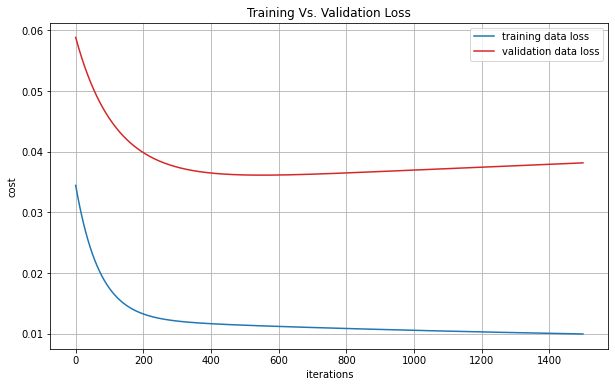

In [19]:
plt.plot(trainingCostHistory,color='tab:blue',label='training data loss')
plt.plot(validationCostHistory,color='tab:red',label='validation data loss')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Training Vs. Validation Loss')
plt.legend()